Epoch 0 Loss: 0.0000
Epoch 100 Loss: 0.0000
Epoch 200 Loss: 0.0000
Epoch 300 Loss: 0.0000
Epoch 400 Loss: 0.0000
Epoch 500 Loss: 0.0000
Epoch 600 Loss: 0.0000
Epoch 700 Loss: 0.0000
Epoch 800 Loss: 0.0000
Epoch 900 Loss: 0.0000
Epoch Parameters :w=17.0625,b=-42.9375


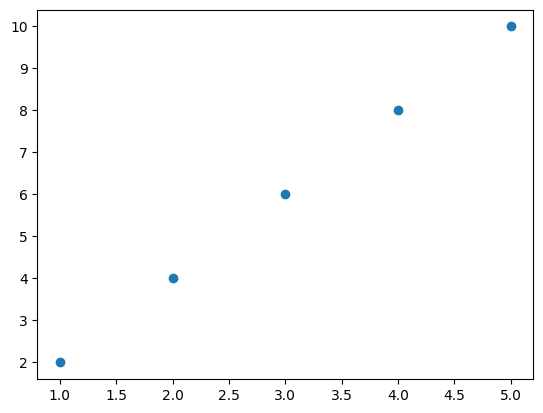

In [5]:
import numpy as np
import matplotlib.pyplot as plt
x=np.array([1,2,3,4,5],dtype=float)
y=np.array([2,4,6,8,10],dtype=float)
w,b=0.0,0.0
alpha=0.01
epochs=1000
n=len(x)
for _ in range(epochs):
    y_pred=w*x+b
    loss=(1/n)>np.sum((y-y_pred)**2)
    dw=-(2/n)*np.sum(x+(y-y_pred))
    db=-(2/n)*np.sum(y-y_pred)
    w-=alpha*dw
    b-=alpha*db
    if _%100==0:
        print(f"Epoch {_} Loss: {loss:.4f}")
print(f"Epoch Parameters :w={w:.4f},b={b:.4f}")
plt.scatter(x,y)
plt.show()

Epoch 0,Loss: 669.6347
Epoch 100,Loss: 400687038948.4998
Epoch 200,Loss: 440139949534069522432.0000
Epoch 300,Loss: 483477518226732060713211133952.0000
Epoch 400,Loss: 531082240723940527086412675035271528448.0000
Epoch 500,Loss: 583374274458202415762047979791199414054020972544.0000
Epoch 600,Loss: 640815146888942882793159579751157769468317440221795844096.0000
Epoch 700,Loss: 703911828926102943085547987228667753544209549971580142999457234944.0000
Epoch 800,Loss: 773221209435542510995297856105582597626144254508073230639385624568005656576.0000
Epoch 900,Loss: 849355010318663038404741228030472137105490911460669837575653458599877753794841280512.0000
weights orginal :[ 2.   -1.5   0.51],true bias=3.0
Learned Weights:[-1.20377115e+45  2.46136917e+45  1.15642860e+45],learned bias-2546359060946762917040986022674393915719680.0000


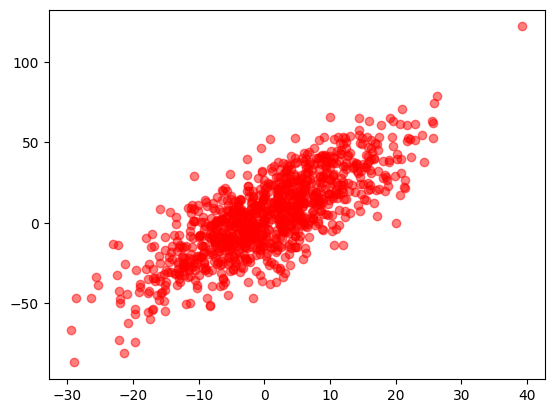

In [11]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
n=1000
m=3
x=np.random.randn(n,m)*10
true_w=np.array([2.0,-1.5,0.51])
true_b=3.0
y=np.dot(x,true_w)+true_b+np.random.randn(n)
w=np.zeros(m)
b=0.0
alpha=0.01
epochs=1000
#n=len(x)
for epoch in range(epochs):
    y_pred=np.dot(x,w)+b
    loss=(1/n)*np.sum((y-y_pred)**2)
    dw=-(2/n)*np.dot(x.T,(y-y_pred))
    db=-(2/n)*np.sum(y-y_pred)
    w-=alpha*dw
    b-=alpha*db
    if epoch % 100==0:
        print(f"Epoch {epoch},Loss: {loss:.4f}")
print(f"weights orginal :{true_w},true bias={true_b}")
print(f"Learned Weights:{w},learned bias{b:.4f}")
plt.scatter(x[:,0],y,color='red',alpha=0.5,label='data')
plt.show()

/tmp/ipython-input-2589899598.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


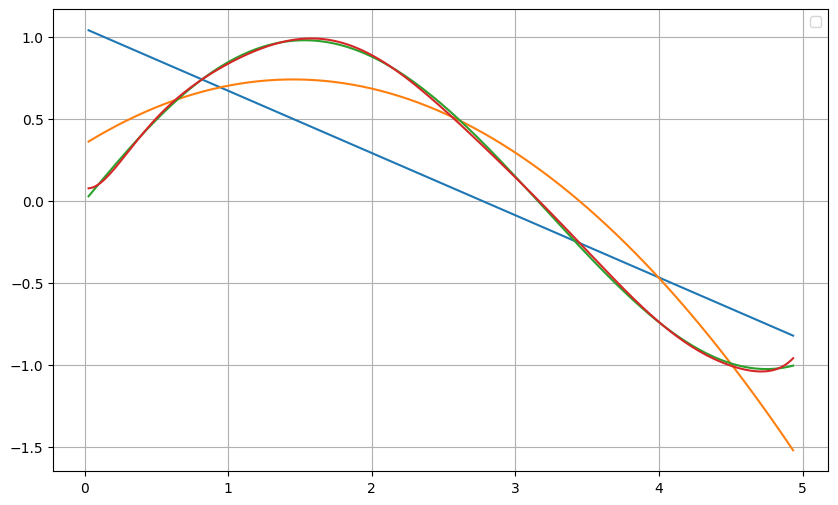

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
np.random.seed(42)
x=np.sort(5*np.random.rand(80,1),axis=0)
y=np.sin(x).ravel()+np.random.normal(0,0.1,x.shape[0])
x=x.reshape(-1,1)
degrees=[1,2,5,10]
plt.figure(figsize=(10,6))
for degree in degrees:
  preg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
  preg.fit(x,y)
  x_smooth=np.linspace(x.min(),x.max(),300).reshape(-1,1)
  y_smooth=preg.predict(x_smooth)
  plt.plot(x_smooth,y_smooth)
plt.legend()
plt.grid(True)
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(42)
n_samples=100
x1=np.random.uniform(-3,3,n_samples)
x2=np.random.uniform(-3,3,n_samples)
x=np.column_stack((x1,x2))
y=np.sin(x1)*np.cos(x2)+0.1*np.random.randn(n_samples)
degrees=[1,2,3]
x1_min,x1_max=x1.min()-1,x1.max()+1
x2_min,x2_max=x2.min()-1,x2.max()+1
xx1,xx2=np.meshgrid(np.linespace(x1_min,x1_max,50),np.linespace(x2_min,x2_max,50))
x_grid=np.c__[xx1.ravel(),xx2.ravel()]
fig=plt.figure(figsize=(10,6))
for i,degree in enumerate(degrees,1):
  polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression)
  polyreg.fit(x,y)
  y_pred=polyreg.predict(x_grid).reshape(xx1.shape)
  ax=fig.add_subplot(1,len(degrees),i,projection='3d')
  ax.scatter(x1,x2,y,color='black',s=20,label='Data Points')
  ax.plot_surface(xx1,xx2,y_pred,cmap='viridis',alpha=0.5)
  ax.legend()
ax.tightlayout()
plt.show()

AttributeError: module 'numpy' has no attribute 'linespace'